# Gaussian blur, Sharpen, Blur, Edge detection

Application pour appliquer plusieurs filtres sur une même image en parallèle.
Premièrement nous importont les librairies utilisées.

In [76]:
using Images, Colors, Base;

if nprocs() < 4
    addprocs(5);
end

@everywhere using Images, Colors, Base;

Charger l'image et la transformer en un array de 3 dimensions RBG.

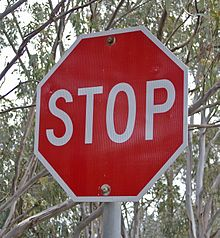

In [77]:
@everywhere begin
    img = load("stop.jpg");
    color_image = convert(Array{Float64},channelview(img));

    _, img_width, img_height = size(color_image);    
end
img

Faire une fonction qui applique un filtre quelquonque sur une image.

In [73]:
@everywhere function apply_color_filter(im, kernel)
    p = trunc(Int,(size(kernel, 1)-1)/2)
    result = copy(im)
    
    _, img_width, img_height = size(im);
    
    for x = p+1:img_width-p
        for y = p+1:img_height-p

            r = im[1, x-p:x+p, y-p:y+p]
            g = im[2, x-p:x+p, y-p:y+p]
            b = im[3, x-p:x+p, y-p:y+p]

            result[1, x, y] = sum(r .* kernel)
            result[2, x, y] = sum(g .* kernel)
            result[3, x, y] = sum(b .* kernel) 
        end
    end
    return result
end

Déclarer 4 différent type de "kernel" qui seront utilisés pour filtrer l'image.

In [ ]:
gaussian_blur=[1 4 6 4 1;4 16 24 16 4;6 24 36 24 6;4 16 24 16 4;1 4 6 4 1]
gaussian_blur = gaussian_blur./sum(gaussian_blur);

sharpen = [0 -1 0;-1 5 -1;0 -1 0];

blur=[1 1 1 1 1;1 1 1 1 1;1 1 1 1 1;1 1 1 1 1;1 1 1 1 1;]
blur= blur./sum(blur)

edge=[-1 -1 -1;-1 8 -1;-1 -1 -1]

Appliquer les filtres sur les images en parallèle

In [80]:
ks=[
    gaussian_blur,
    sharpen,
    blur,
    edge
];

f = pmap((im,k)->apply_color_filter(im,k),
        [color_image for i in 1:4],
        ks);

Afficher les résultats.

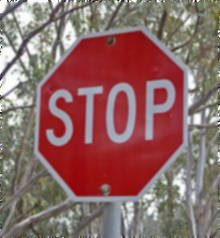

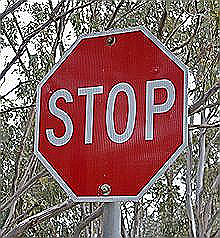

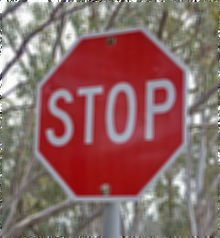

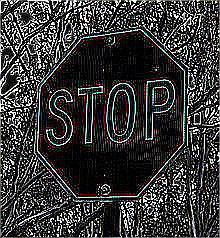

In [79]:
for i = 1:4
    display(colorview(RGB, f[i]))
end